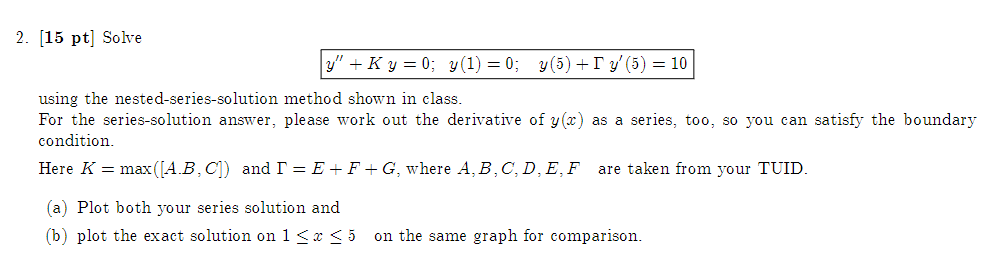

In [144]:
import numpy as np
import matplotlib.pyplot as plt

In [145]:
TUID = [9, 1, 5, 1, 8, 7, 2, 8, 9]
LETTER_MAP = ['I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']
total_sum = 0

for i in range(len(TUID)):
    total_sum += TUID[i]

average = total_sum / len(TUID)

print(f'my TUID average: {average}')

# Create a dictionary to map letters to integers
letter_to_int_map = {letter: integer for letter, integer in zip(LETTER_MAP, TUID)}

# Now, calculate the average of the letters of interest
K_letters = ["A", "B", "C"]
iota_letters = ["E", "F", "G"]

K = np.max([letter_to_int_map[letter] for letter in K_letters])
print(K)

iota = np.sum([letter_to_int_map[letter] for letter in iota_letters])
print(iota)


my TUID average: 5.555555555555555
9
14


### Nested Power Series Solutiuon

In [146]:
# Define the number of terms
N = 400

# Preallocate the array for the coefficients with zeros
a = np.zeros(N)

# Initial conditions
a[0] = 0
a[1] = 1/7

# Calculate the coefficients based on your provided pattern
for n in range(2, N):
    if n % 2 == 1:  # Odd n
        p = (n - 2) // 2
        a[n] = -9 * a[n-2] / ((p + 2) * (p + 1))
    # Even n values remain zero, which is the default

# Compute y(x) over the range 1<=x<=5
x_vals_power_series = np.linspace(1, 5, 400)
y_vals_power_series = sum([a[n] * x_vals_power_series**n for n in range(N)])

### Exact Solution

In [147]:
# Given constants
K = 9
r = 14

# From the derived equation:
B = 10 / (np.sin(15) + 14 * 3 * np.cos(15))

# Define y(x) using derived B
def y(x):
    return B * np.sin(3*x)

# Generate x values
x_vals_exact = np.linspace(1, 5, 400)

# Calculate y values
y_vals_exact = y(x_vals_exact)


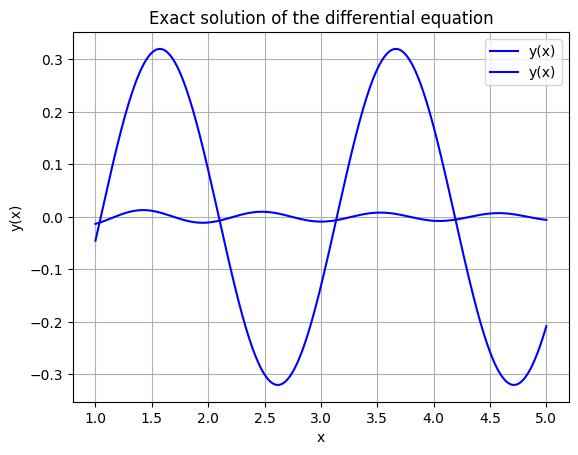

In [148]:
# Plot
plt.plot(x_vals_power_series, y_vals_power_series, label='y(x)', color='blue')
plt.plot(x_vals_exact, y_vals_exact, label='y(x)', color='blue')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Exact solution of the differential equation')
plt.legend()
plt.grid(True)
plt.show()